In [1]:
import sys
import subprocess

# Create a virtual environment
subprocess.run([sys.executable, '-m', 'venv', 'myenv'])

# Activate the virtual environment
activate_script = 'myenv\\Scripts\\activate'
subprocess.run(activate_script, shell=True)


CompletedProcess(args='myenv\\Scripts\\activate', returncode=0)

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


# Import necessary Libaries

In [7]:
import re
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import gensim
from gensim import corpora
from gensim import models
from gensim.models.coherencemodel import CoherenceModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfVectorizer


import warnings
warnings.filterwarnings("ignore")




# Data Preparation

# Read file in txt mode 

In [8]:
# Step 1: Read the text file
file_path = r"C:\Users\Great Woman\Downloads\Amazon Product Review.txt"

with open(file_path, "r", encoding="utf-8") as file:
    data = file.readlines()

# Step 2: Explore the data
print("Number of lines in the dataset:", len(data))
print("Sample data:")
for line in data[:5]:  # Displaying the first 5 lines as a sample
    print(line)



Number of lines in the dataset: 30847
Sample data:
marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment

US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1

US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally shuts down apps ...,Lots of ads<br />Slow processing speed<br />Occasionally shuts down apps<br />WIFI keeps having authentication issues<br /><br />Was cheap for a tablet and now i know why.,2015-08-31,0

US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,"Excellent unit.  The versatility of this tablet, besides being competitively priced is a solution to the elderly.  Poor eyesight 

# Display first few lines in txt mode

In [9]:
# File path to your dataset
file_path = r"C:\Users\Great Woman\Downloads\Amazon Product Review.txt"

# Initialize an empty list to store the lines of the dataset
data_lines = []

# Open the text file and read it line by line
with open(file_path, "r", encoding="utf-8") as file:
    for line in file:
        data_lines.append(line.strip())  # Remove leading/trailing whitespaces and add the line to the list

# Display the number of lines read from the dataset
print("Number of lines in the dataset:", len(data_lines))

# Display the first few lines of the dataset as a sample
print("data:")
for line in data_lines[:5]:  # Displaying the first 5 lines as a sample
    print(line)


Number of lines in the dataset: 30847
data:
marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally shuts down apps ...,Lots of ads<br />Slow processing speed<br />Occasionally shuts down apps<br />WIFI keeps having authentication issues<br /><br />Was cheap for a tablet and now i know why.,2015-08-31,0
US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,"Excellent unit.  The versatility of this tablet, besides being competitively priced is a solution to the elderly.  Poor eyesight and physic

# Data Cleaning in txt mode

In [10]:
# Define a function to clean the text data
def clean_text(text):
    # Remove HTML tags (if any)
    clean_text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and special characters
    clean_text = re.sub(r'[^\w\s]', ' ', clean_text)
    # Convert the text to lowercase
    clean_text = clean_text.lower()
    return clean_text

# Clean each line of text in the dataset
cleaned_data = [clean_text(line) for line in data_lines]

# Display the cleaned data for the first few lines as a sample
print("cleaned data:")
for line in cleaned_data[:5]:  # Displaying the first 5 cleaned lines as a sample
    print(line)


cleaned data:
marketplace customer_id review_id product_id product_parent product_title product_category star_rating helpful_votes total_votes vine verified_purchase review_headline review_body review_date sentiment
us 11555559 r1qxc7ahhjbq3o b00ikpx4gy 2693241  fire hd 7  7   hd display  wi fi  8 gb  pc 5 0 0 n y five stars great love it 2015 08 31 1
us 31469372 r175vsrv6zetop b00ikpykwg 2693241  fire hd 7  7   hd display  wi fi  8 gb  pc 3 0 0 n n lots of ads slow processing speed occasionally shuts down apps     lots of adsslow processing speedoccasionally shuts down appswifi keeps having authentication issueswas cheap for a tablet and now i know why  2015 08 31 0
us 26843895 r2hrff78mwgy19 b00ikpw0ua 2693241  fire hd 7  7   hd display  wi fi  8 gb  pc 5 0 0 n y well thought out device  excellent unit   the versatility of this tablet  besides being competitively priced is a solution to the elderly   poor eyesight and physical disabilities associated with age and using the supporting

# Display from txt mode to dataframe

In [11]:
# Define the file path
file_path = r"C:\Users\Great Woman\Downloads\Amazon Product Review.txt"

# Read the data into a DataFrame
df = pd.read_csv(file_path, delimiter=',')

# Display the first few rows of the DataFrame
df.head()


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


In [12]:
# Load the data from the text file into a DataFrame
file_path = r"C:\Users\Great Woman\Downloads\Amazon Product Review.txt"
df = pd.read_csv(file_path)

# Display basic information about the DataFrame
print("DataFrame Information:")
print(df.info())

# Generate a statistical summary of numerical columns
print("\nStatistical Summary of Numerical Columns:")
print(df.describe())


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30844 non-null  object
 13  review_body        30842 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), obje

# Data Cleaning

In [13]:
# Load the DataFrame from the text file
file_path = r"C:\Users\Great Woman\Downloads\Amazon Product Review.txt"
df = pd.read_csv(file_path)

# 1. Handle Missing Values
missing_values = df.isnull().sum()  # Check for missing values
df.dropna(inplace=True)  # Drop rows with any missing values

# 2. Convert Data Types
df['review_date'] = pd.to_datetime(df['review_date'])  # Convert 'review_date' to datetime

# 3. Remove Duplicates
duplicates = df.duplicated().sum()  # Check for duplicates
df.drop_duplicates(inplace=True)

# 4. Text Cleaning (Example: Removing stopwords)
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['review_body'] = df['review_body'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Display the cleaned DataFrame
print("Cleaned DataFrame:")
print(df.head())

# Display missing values and duplicates information
print("\nMissing Values:")
print(missing_values)
print("\nDuplicates:", duplicates)


Cleaned DataFrame:
  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     11555559  R1QXC7AHHJBQ3O  B00IKPX4GY         2693241   
1          US     31469372  R175VSRV6ZETOP  B00IKPYKWG         2693241   
2          US     26843895  R2HRFF78MWGY19  B00IKPW0UA         2693241   
3          US     19844868   R8Q39WPKYVSTX  B00LCHSHMS         2693241   
4          US      1189852  R3RL4C8YP2ZCJL  B00IKPZ5V6         2693241   

                           product_title product_category  star_rating  \
0  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            5   
1  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            3   
2  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            5   
3  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            4   
4  Fire HD 7, 7" HD Display, Wi-Fi, 8 GB               PC            5   

   helpful_votes  total_votes vine verified_purchase  \
0              0            0    N 

# Exploratory Data Analysis

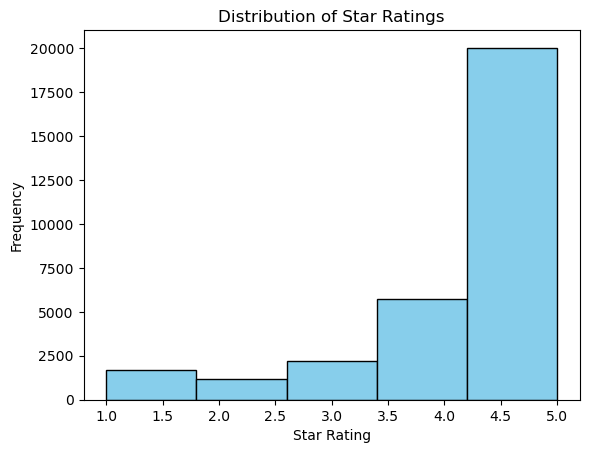

In [14]:
# Plot histogram of star ratings
plt.hist(df['star_rating'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Star Ratings')
plt.show()


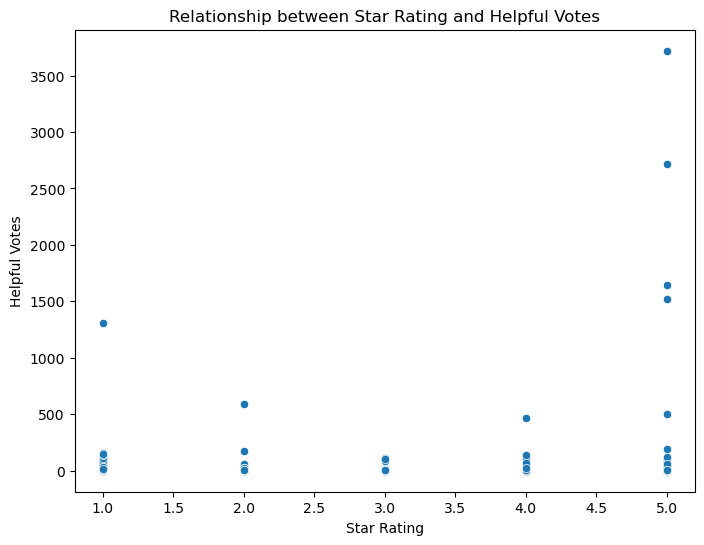

In [15]:
# Plot scatter plot of star rating vs. helpful votes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='star_rating', y='helpful_votes', data=df)
plt.xlabel('Star Rating')
plt.ylabel('Helpful Votes')
plt.title('Relationship between Star Rating and Helpful Votes')
plt.show()


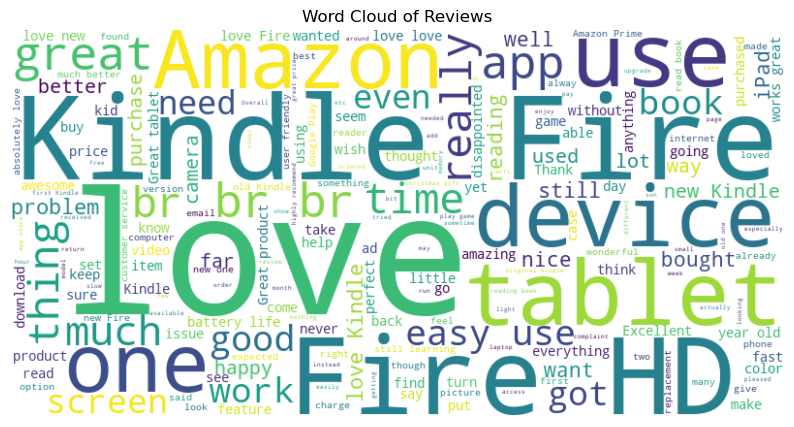

In [16]:
# Combine all review texts into a single string
all_reviews = ' '.join(df['review_body'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


In [17]:
#Sentiment distribution for overall dataset

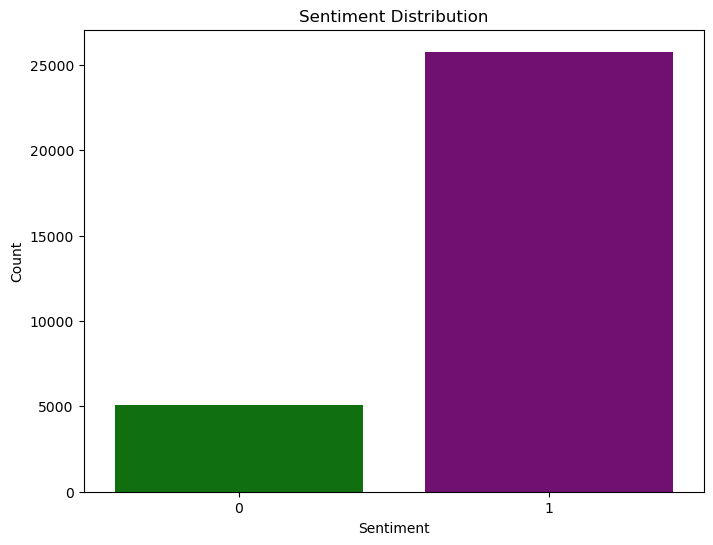

In [18]:
# Define colors for positive and negative sentiments
colors = {"Positive": "green", "Negative": "purple"}

# Plot sentiment distribution with colors specified
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette=colors.values())
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()



In [19]:
#Time Analysis

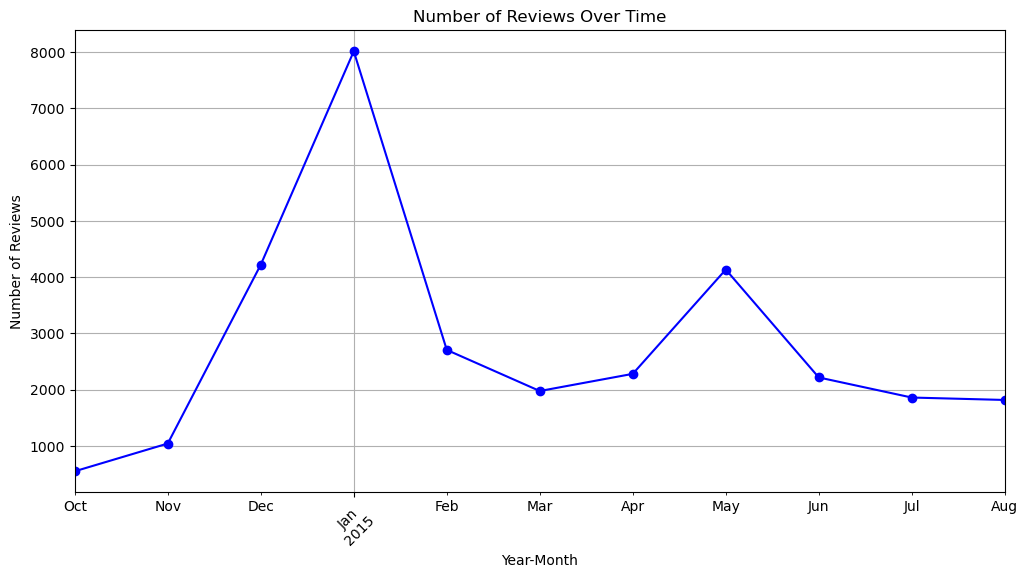

In [20]:
# Plot number of reviews over time
plt.figure(figsize=(12, 6))
df['review_date'] = pd.to_datetime(df['review_date'])
df['Year-Month'] = df['review_date'].dt.to_period('M')
review_count_by_month = df['Year-Month'].value_counts().sort_index()
review_count_by_month.plot(kind='line', marker='o', color='b')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [21]:
#Number of words Analysis

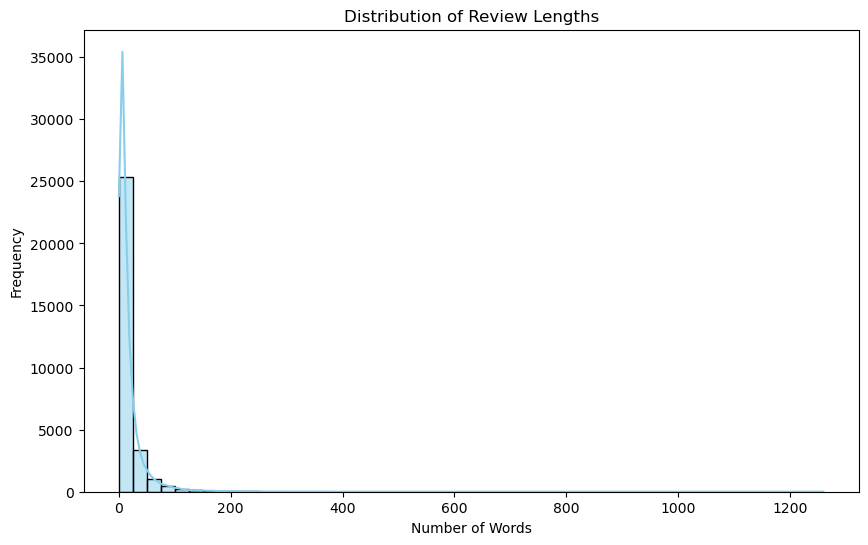

In [22]:
# Compute the length of each review (number of words)
df['review_length'] = df['review_body'].apply(lambda x: len(x.split()))

# Visualize the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


# Word Frequency Analysis

In [23]:
# Concatenate 'review_headline' and 'review_body' columns into a single 'review' column
df['review'] = df['review_headline'] + ' ' + df['review_body']

# Drop the original 'review_headline' and 'review_body' columns if needed
# df.drop(['review_headline', 'review_body'], axis=1, inplace=True)

# Now, you can perform text analysis and sentiment analysis on the 'review' column


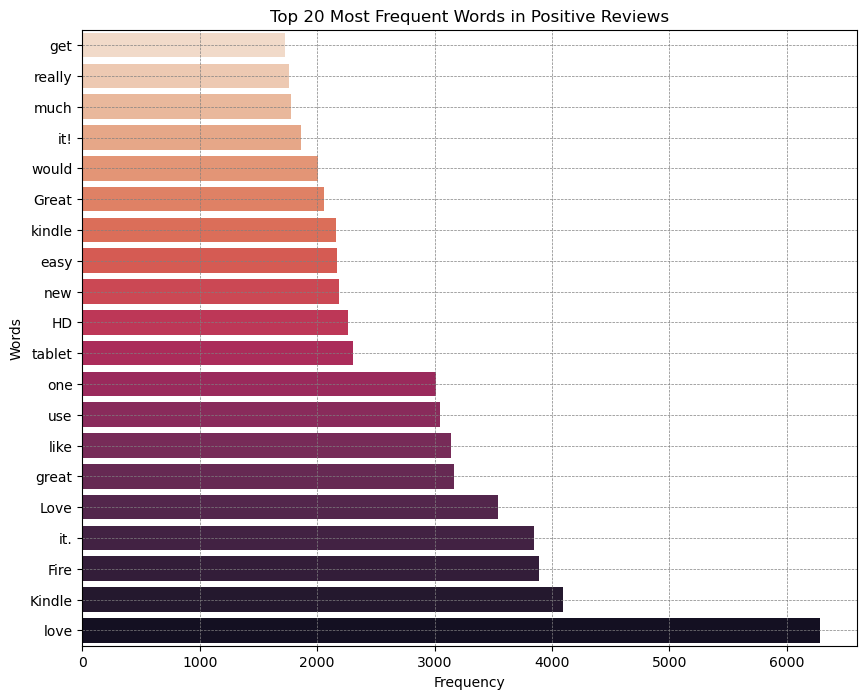

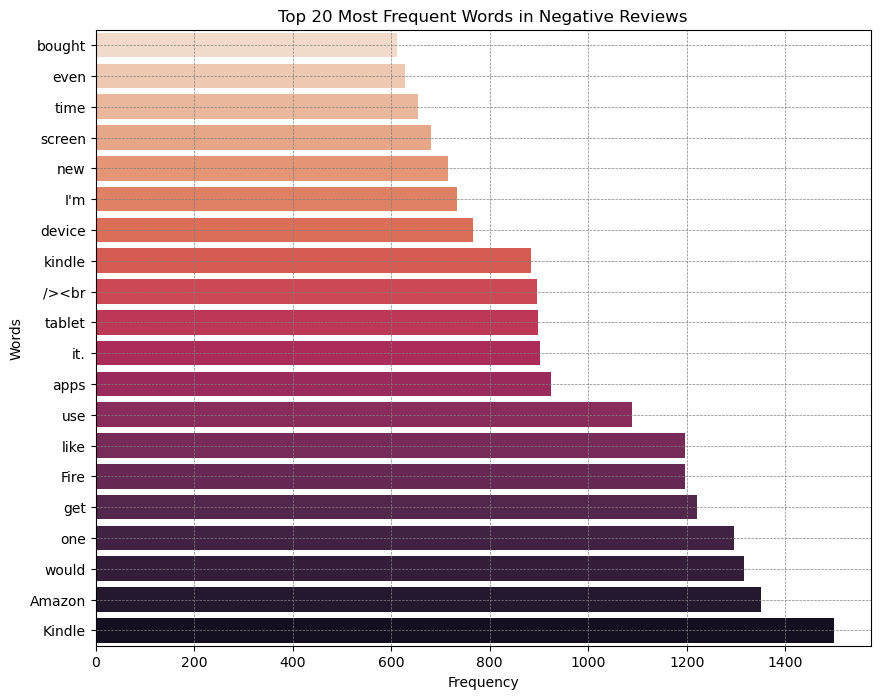

In [24]:
# Tokenize the reviews and calculate word frequencies for each sentiment category
positive_reviews = df[df['sentiment'] == 1]['review_body']
negative_reviews = df[df['sentiment'] == 0]['review_body']

# Check if there are any reviews
if positive_reviews.empty or negative_reviews.empty:
    print("No reviews found in the dataset.")
else:
    positive_words = ' '.join(positive_reviews).split()
    negative_words = ' '.join(negative_reviews).split()

    # Calculate word frequencies
    if positive_words:
        positive_word_freq = Counter(positive_words)
        # Sort word frequencies in descending order
        positive_word_freq_sorted = sorted(positive_word_freq.items(), key=lambda x: x[1], reverse=True)
        # Visualize word frequencies for positive sentiment
        plt.figure(figsize=(10, 8))
        # Define a custom color palette with a colorful gradient
        cmap = sns.color_palette("rocket", 20)
        sns.barplot(x=[word[1] for word in positive_word_freq_sorted[:20]], 
                    y=[word[0] for word in positive_word_freq_sorted[:20]], 
                    palette=cmap)
        plt.title('Top 20 Most Frequent Words in Positive Reviews')
        plt.xlabel('Frequency')
        plt.ylabel('Words')
        plt.gca().invert_yaxis()  # Invert y-axis for descending order
        plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines
        plt.gca().set_facecolor('white')  # Set background color to white
        plt.show()

    if negative_words:
        negative_word_freq = Counter(negative_words)
        # Sort word frequencies in descending order
        negative_word_freq_sorted = sorted(negative_word_freq.items(), key=lambda x: x[1], reverse=True)
        # Visualize word frequencies for negative sentiment
        plt.figure(figsize=(10, 8))
        # Define a custom color palette with a colorful gradient
        cmap = sns.color_palette("rocket", 20)
        sns.barplot(x=[word[1] for word in negative_word_freq_sorted[:20]], 
                    y=[word[0] for word in negative_word_freq_sorted[:20]], 
                    palette=cmap)
        plt.title('Top 20 Most Frequent Words in Negative Reviews')
        plt.xlabel('Frequency')
        plt.ylabel('Words')
        plt.gca().invert_yaxis()  # Invert y-axis for descending order
        plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Add gridlines
        plt.gca().set_facecolor('white')  # Set background color to white
        plt.show()


In [25]:
# Correlation Analysis

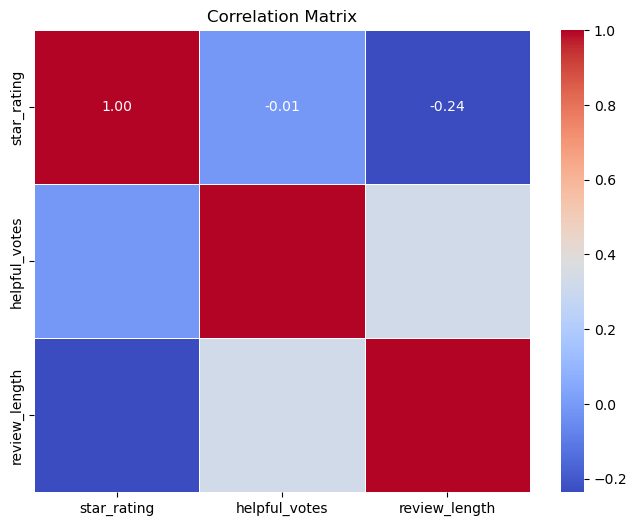

In [26]:
# Compute the correlation matrix
correlation_matrix = df[['star_rating', 'helpful_votes', 'review_length']].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [27]:
# # Comparison between verified and non-verified purchases

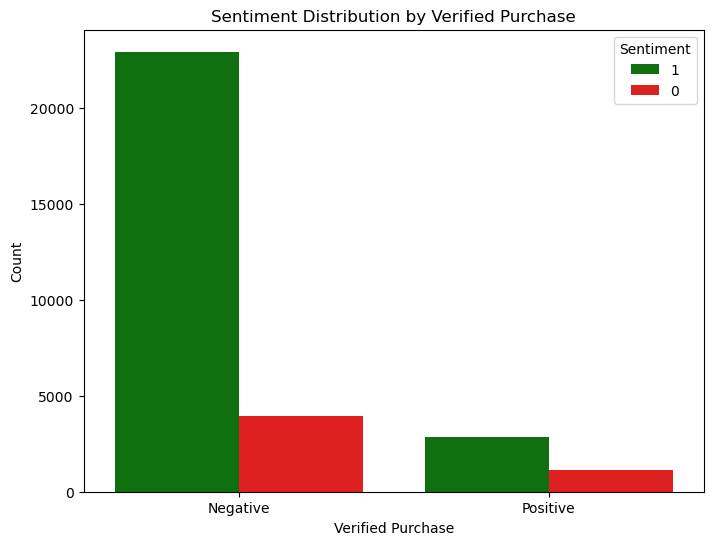

In [28]:
# Define colors for positive and negative sentiments

# Ensure 'sentiment' column contains string values
df['sentiment'] = df['sentiment'].astype(str)

# Define colors for positive and negative sentiments
colors = {"Positive": "green", "Negative": "red"}

plt.figure(figsize=(8, 6))
sns.countplot(x='verified_purchase', hue='sentiment', data=df, palette=colors.values())
plt.title('Sentiment Distribution by Verified Purchase')
plt.xlabel('Verified Purchase')
plt.ylabel('Count')

# Specify legend title
plt.legend(title='Sentiment')

# Replace numerical labels with "Negative" and "Positive"
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"])

plt.show()




In [29]:
# Geographical analysis

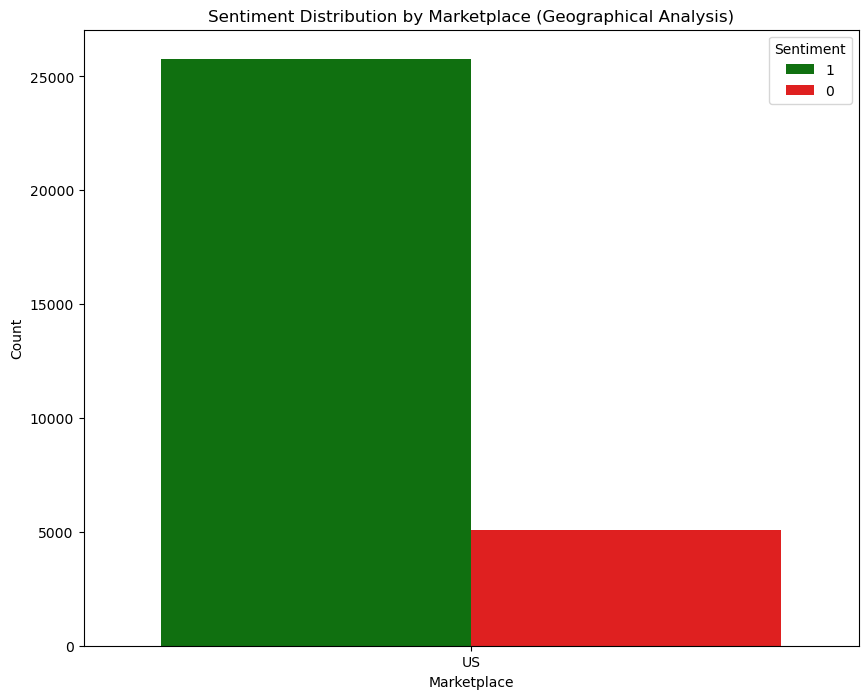

In [30]:
# Define colors for positive and negative sentiments
colors = {"Positive": "green", "Negative": "red"}

plt.figure(figsize=(10, 8))
sns.countplot(x='marketplace', hue='sentiment', data=df, palette=colors.values())
plt.title('Sentiment Distribution by Marketplace (Geographical Analysis)')
plt.xlabel('Marketplace')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


# Pre-Processed Data

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (only required once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize NLTK's WordNet lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Stopword removal and lemmatization
    filtered_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Preprocess the 'review' column
df['preprocessed_review'] = df['review'].apply(preprocess_text)

# Display the preprocessed DataFrame
print(df.head(20))


[nltk_data] Downloading package punkt to C:\Users\Great
[nltk_data]     Woman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Great
[nltk_data]     Woman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Great
[nltk_data]     Woman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   marketplace  customer_id       review_id  product_id  product_parent  \
0           US     11555559  R1QXC7AHHJBQ3O  B00IKPX4GY         2693241   
1           US     31469372  R175VSRV6ZETOP  B00IKPYKWG         2693241   
2           US     26843895  R2HRFF78MWGY19  B00IKPW0UA         2693241   
3           US     19844868   R8Q39WPKYVSTX  B00LCHSHMS         2693241   
4           US      1189852  R3RL4C8YP2ZCJL  B00IKPZ5V6         2693241   
5           US     14239730  R15B8KUCTZEIAZ  B00IKPYKWG         2693241   
6           US     44445848   RH819AVFZQQJD  B00IKPYKWG         2693241   
7           US     28328595  R3AUPGXXHD3Y2K  B00IKPZ5V6         2693241   
8           US     13496210  R39KKR7TWFHENK  B00LCHRQL6         2693241   
9           US     16092745  R2TPJAFH6DBEEZ  B00IKPYKWG         2693241   
10          US     17866289  R31K70PZYKP456  B00IKPZ5V6         2693241   
11          US     13443121  R1ME7QUMA7VEU2  B00IKPYKWG         2693241   
12          US     279584

In [32]:
# Tokenize the preprocessed text data
tokenized_text = [text.split() for text in df['preprocessed_review']]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_text)

# Print token to ID mapping
print(dictionary.token2id)


{'five': 0, 'great': 1, 'love': 2, 'star': 3, '.': 4, '...': 5, '/': 6, '<': 7, '>': 8, 'ad': 9, 'apps': 10, 'authentication': 11, 'br': 12, 'cheap': 13, 'issue': 14, 'keep': 15, 'know': 16, 'lot': 17, 'occasionally': 18, 'processing': 19, 'shuts': 20, 'slow': 21, 'speed': 22, 'tablet': 23, 'wifi': 24, '!': 25, '(': 26, ')': 27, ',': 28, 'add': 29, 'age': 30, 'allows': 31, 'associated': 32, 'back': 33, 'besides': 34, 'book': 35, 'changing': 36, 'class': 37, 'competitively': 38, 'computer': 39, 'copier': 40, 'costly': 41, 'created': 42, 'device': 43, 'disability': 44, 'effort': 45, 'elderly': 46, 'excellent': 47, 'eyesight': 48, 'farwell': 49, 'feature': 50, 'fire': 51, 'gain': 52, 'good': 53, 'hd7': 54, 'hmdi': 55, 'ink': 56, 'instruction': 57, 'keyboard': 58, 'learn': 59, 'little': 60, 'much': 61, 'noel': 62, 'oh': 63, 'open': 64, 'paper': 65, 'physical': 66, 'poor': 67, 'priced': 68, 'printer': 69, 'read.': 70, 'realistic': 71, 'ream': 72, 'see': 73, 'sheet': 74, 'show': 75, 'solutio

In [33]:
# Tokenize the preprocessed text data
tokenized_text = [text.split() for text in df['preprocessed_review']]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_text)

# Convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Print summary information about the corpus
print(f"Number of documents in the corpus: {len(corpus)}")
print(f"Example document-term matrix: {corpus[:5]}")


Number of documents in the corpus: 30840
Example document-term matrix: [[(0, 1), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 1), (6, 5), (7, 5), (8, 5), (9, 2), (10, 2), (11, 1), (12, 5), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (23, 1), (24, 1)], [(4, 4), (6, 5), (7, 5), (8, 5), (12, 5), (23, 1), (25, 1), (26, 1), (27, 1), (28, 3), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1)], [(2, 2), (4, 10), (10, 1), (17, 2), 

In [34]:
# Build the LDA model
num_topics = 5
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print summary information about the LDA model
print("LDA Model Summary:")
print(f"Number of topics: {num_topics}")
print(f"Number of passes: {lda_model.passes}")

# Print the top words for each topic
print("\nTop words for each topic:")
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx}: {topic}')

# Assign topics to each document
df['topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

# Display the DataFrame with topics assigned
print("\nSample of DataFrame with topics assigned:")
print(df[['review_id', 'preprocessed_review', 'topic']].head(10))


LDA Model Summary:
Number of topics: 5
Number of passes: 15

Top words for each topic:
Topic 0: 0.199*"star" + 0.140*"five" + 0.083*"." + 0.059*"love" + 0.058*"great" + 0.035*"four" + 0.019*"good" + 0.019*"easy" + 0.018*"use" + 0.015*"tablet"
Topic 1: 0.098*"." + 0.039*"one" + 0.023*"year" + 0.022*"bought" + 0.022*"gift" + 0.016*"christmas" + 0.016*"old" + 0.015*"got" + 0.015*"kindle" + 0.014*"kid"
Topic 2: 0.097*"." + 0.060*"," + 0.012*"tablet" + 0.011*"kindle" + 0.011*"like" + 0.009*"fire" + 0.008*"use" + 0.008*"amazon" + 0.008*"would" + 0.007*"good"
Topic 3: 0.118*"--" + 0.089*"/" + 0.088*">" + 0.088*"<" + 0.088*"br" + 0.042*"&" + 0.039*";" + 0.033*"#" + 0.032*"34" + 0.013*","
Topic 4: 0.170*"!" + 0.084*"love" + 0.066*"." + 0.058*"fire" + 0.054*"kindle" + 0.034*"hd" + 0.023*"," + 0.020*"7" + 0.019*"new" + 0.019*"great"

Sample of DataFrame with topics assigned:
        review_id                                preprocessed_review  topic
0  R1QXC7AHHJBQ3O                              

In [35]:
# Print the top words for each topic
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx}:')
    print('Words:', topic)


Topic 0:
Words: 0.199*"star" + 0.140*"five" + 0.083*"." + 0.059*"love" + 0.058*"great" + 0.035*"four" + 0.019*"good" + 0.019*"easy" + 0.018*"use" + 0.015*"tablet"
Topic 1:
Words: 0.098*"." + 0.039*"one" + 0.023*"year" + 0.022*"bought" + 0.022*"gift" + 0.016*"christmas" + 0.016*"old" + 0.015*"got" + 0.015*"kindle" + 0.014*"kid"
Topic 2:
Words: 0.097*"." + 0.060*"," + 0.012*"tablet" + 0.011*"kindle" + 0.011*"like" + 0.009*"fire" + 0.008*"use" + 0.008*"amazon" + 0.008*"would" + 0.007*"good"
Topic 3:
Words: 0.118*"--" + 0.089*"/" + 0.088*">" + 0.088*"<" + 0.088*"br" + 0.042*"&" + 0.039*";" + 0.033*"#" + 0.032*"34" + 0.013*","
Topic 4:
Words: 0.170*"!" + 0.084*"love" + 0.066*"." + 0.058*"fire" + 0.054*"kindle" + 0.034*"hd" + 0.023*"," + 0.020*"7" + 0.019*"new" + 0.019*"great"


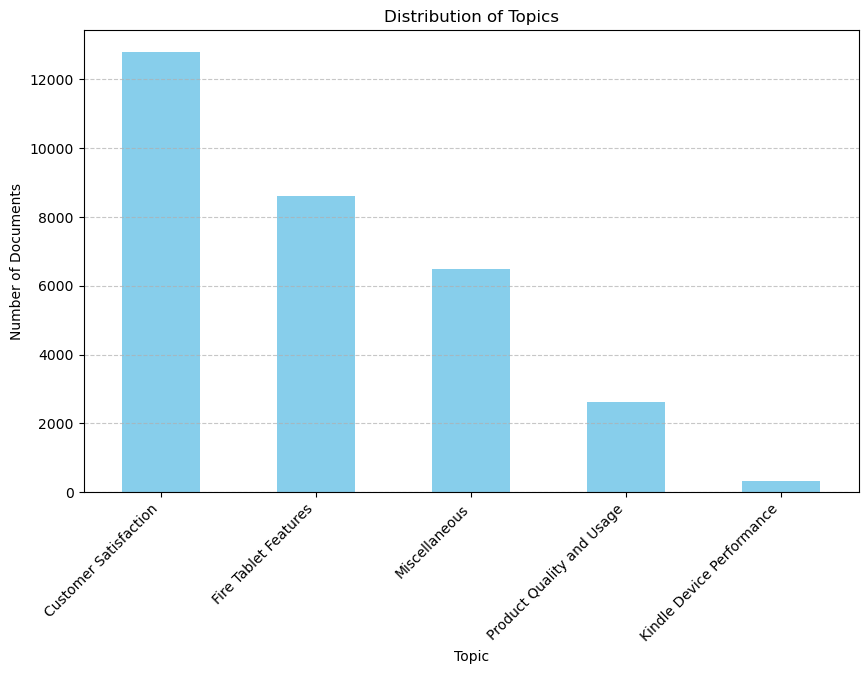

In [36]:
# Define topic names based on interpretation
topic_names = {
    0: 'Fire Tablet Features',
    1: 'Product Quality and Usage',
    2: 'Customer Satisfaction',
    3: 'Kindle Device Performance',
    4: 'Miscellaneous'
}

# Map topic IDs to their corresponding names
df['topic_name'] = df['topic'].map(topic_names)

# Count the number of documents assigned to each topic
topic_distribution = df['topic_name'].value_counts()

# Plot the distribution of topics
plt.figure(figsize=(10, 6))
topic_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1000x600 with 0 Axes>

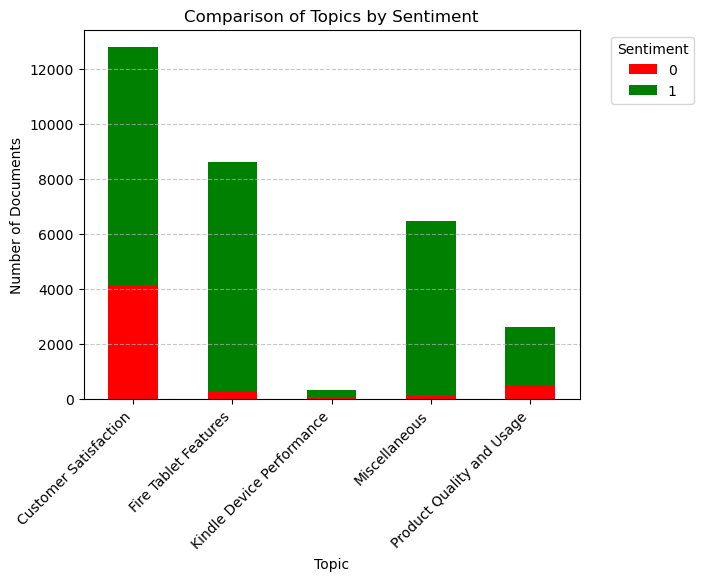

In [37]:
# Compare topics across different subsets of the data
topic_comparison = df.groupby(['topic_name', 'sentiment']).size().unstack(fill_value=0)

# Plot the comparison of topics by sentiment
plt.figure(figsize=(10, 6))
topic_comparison.plot(kind='bar', stacked=True, cmap='coolwarm', color=['red', 'green'])
plt.title('Comparison of Topics by Sentiment')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [38]:
# Generate summaries for each topic by extracting representative documents or sentences
topic_summaries = df.groupby('topic_name')['preprocessed_review'].apply(lambda x: '. '.join(x.head(3))).reset_index()

# Display the topic summaries
print(topic_summaries)


                  topic_name  \
0      Customer Satisfaction   
1       Fire Tablet Features   
2  Kindle Device Performance   
3              Miscellaneous   
4  Product Quality and Usage   

                                 preprocessed_review  
0  lot ad slow processing speed occasionally shut...  
1  five star great love. five star amazon product...  
2  great kid 's tablet paired amazon free time gr...  
3  five star really enjoy new kindle , easy use o...  
4  love old kindles one lot . love. love kindle f...  


In [39]:
#Evaluation of Sentiments

In [40]:
# Compute coherence score
coherence_model = CoherenceModel(model=lda_model, texts=tokenized_text, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")


Coherence Score: 0.4104232643503221


# Sentiment Labeling

In [41]:
# Define a function to perform sentiment analysis and return the sentiment label
def get_sentiment_label(text):
    analysis = TextBlob(text)
    # Determine the sentiment polarity
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to each text in your DataFrame and create a new column for sentiment labels
df['sentiment'] = df['preprocessed_review'].apply(get_sentiment_label)

# Display the DataFrame with sentiment labels
print(df[['review_id', 'preprocessed_review', 'sentiment']].head())



        review_id                                preprocessed_review sentiment
0  R1QXC7AHHJBQ3O                               five star great love  Positive
1  R175VSRV6ZETOP  lot ad slow processing speed occasionally shut...  Negative
2  R2HRFF78MWGY19  well thought device excellent unit . versatili...  Positive
3   R8Q39WPKYVSTX  apps/games looking forward using compatible ta...  Positive
4  R3RL4C8YP2ZCJL  five star amazon product continue meet expecta...   Neutral


# Text Vectorization & Model Building

In [42]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')

# Fit and transform the preprocessed text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['preprocessed_review'])

# Print the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)


Shape of TF-IDF matrix: (30840, 4030)


In [43]:
# Define the number of features you want to select
k_features = 2000

# Initialize SelectKBest with the chi-square (chi2) statistical test
selector = SelectKBest(score_func=chi2, k=k_features)

# Fit the selector to the TF-IDF matrix
tfidf_matrix_selected = selector.fit_transform(tfidf_matrix, df['sentiment'])

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the selected feature names from the TfidfVectorizer
selected_feature_names = tfidf_vectorizer.get_feature_names_out()[selected_feature_indices]

# Print the selected feature names
print("Selected Feature Names:", selected_feature_names)


Selected Feature Names: ['00' '10' '100' ... 'zero' 'zone' 'zoom']


In [44]:
# Normalize the TF-IDF matrix using L2 normalization
tfidf_matrix_normalized = normalize(tfidf_matrix_selected, norm='l2')


In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix_selected, df['sentiment'], test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
clf = LogisticRegression()

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict the sentiment labels for the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9463359273670557


In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix_selected, df['sentiment'], test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predict the sentiment labels for the test data
y_pred = logreg_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Model:", accuracy)


Accuracy of Logistic Regression Model: 0.9463359273670557


In [47]:
# Initialize classifiers
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier(random_state=42)
mlp_model = MLPClassifier(random_state=42)
svm_model = SVC(kernel='linear', random_state=42)

# Initialize results dictionary
results = {}

# Fit and evaluate Logistic Regression model
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
results['Logistic Regression'] = accuracy_logreg

# Fit and evaluate Random Forest model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results['Random Forest'] = accuracy_rf

# Fit and evaluate MLP Classifier model
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
results['MLP Classifier'] = accuracy_mlp

# Fit and evaluate SVM model
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
results['SVM'] = accuracy_svm



In [48]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict the sentiment labels for the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of Random Forest Model:", accuracy_rf)


Accuracy of Random Forest Model: 0.9272049286640727


In [49]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict the sentiment labels for the test data
y_pred_svm = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM Model:", accuracy_svm)


Accuracy of SVM Model: 0.9482814526588845


In [50]:
# Initialize the neural network model
mlp_model = MLPClassifier(random_state=42)

# Fit the model on the training data
mlp_model.fit(X_train, y_train)

# Predict the sentiment labels for the test data
y_pred_mlp = mlp_model.predict(X_test)

# Calculate the accuracy of the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy of MLP Model:", accuracy_mlp)


Accuracy of MLP Model: 0.9511997405966277


# Model Evaluation

In [51]:
# Initialize the classifiers
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier(random_state=42)
mlp_model = MLPClassifier(random_state=42)
svm_model = SVC(kernel='linear', random_state=42)

# Check if the classifiers are initialized correctly
print("Logistic Regression Model:", logreg_model)
print("Random Forest Model:", rf_model)
print("MLP Classifier Model:", mlp_model)
print("SVM Model:", svm_model)



Logistic Regression Model: LogisticRegression()
Random Forest Model: RandomForestClassifier(random_state=42)
MLP Classifier Model: MLPClassifier(random_state=42)
SVM Model: SVC(kernel='linear', random_state=42)


In [52]:
# Fit the Logistic Regression model
print("Fitting Logistic Regression model...")
logreg_model.fit(X_train, y_train)
print("Logistic Regression model fitted.")

# Fit the Random Forest model
print("Fitting Random Forest model...")
rf_model.fit(X_train, y_train)
print("Random Forest model fitted.")

# Fit the MLP Classifier model
print("Fitting MLP Classifier model...")
mlp_model.fit(X_train, y_train)
print("MLP Classifier model fitted.")

# Fit the SVM model
print("Fitting SVM model...")
svm_model.fit(X_train, y_train)
print("SVM model fitted.")


Fitting Logistic Regression model...
Logistic Regression model fitted.
Fitting Random Forest model...
Random Forest model fitted.
Fitting MLP Classifier model...
MLP Classifier model fitted.
Fitting SVM model...
SVM model fitted.


In [53]:
# Initialize the classifiers
classifiers = {
    'Logistic Regression': logreg_model,
    'Random Forest': rf_model,
    'MLP Classifier': mlp_model,
    'SVM': svm_model
}

# Perform cross-validation for each classifier and compute accuracy scores
results = {}
for name, clf in classifiers.items():
    print(f"Evaluating {name}...")
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores

# Display the mean accuracy scores for each classifier
for name, scores in results.items():
    print(f"Mean accuracy for {name}: {scores.mean():.4f}")


Evaluating Logistic Regression...
Evaluating Random Forest...
Evaluating MLP Classifier...
Evaluating SVM...
Mean accuracy for Logistic Regression: 0.9417
Mean accuracy for Random Forest: 0.9293
Mean accuracy for MLP Classifier: 0.9489
Mean accuracy for SVM: 0.9471


In [54]:
mean_accuracy_logreg = results['Logistic Regression'].mean()
mean_accuracy_rf = results['Random Forest'].mean()
mean_accuracy_mlp = results['MLP Classifier'].mean()
mean_accuracy_svm = results['SVM'].mean()

print("Mean Accuracy - Logistic Regression:", mean_accuracy_logreg)
print("Mean Accuracy - Random Forest:", mean_accuracy_rf)
print("Mean Accuracy - MLP Classifier:", mean_accuracy_mlp)
print("Mean Accuracy - SVM:", mean_accuracy_svm)

# Identify the best-performing classifier
best_classifier = max([mean_accuracy_logreg, mean_accuracy_rf, mean_accuracy_mlp, mean_accuracy_svm])
print("Best Performing Classifier:", best_classifier)


Mean Accuracy - Logistic Regression: 0.9416747757326804
Mean Accuracy - Random Forest: 0.9292719746653804
Mean Accuracy - MLP Classifier: 0.9488894255232905
Mean Accuracy - SVM: 0.9471465492422982
Best Performing Classifier: 0.9488894255232905


In [55]:
# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'max_iter': [100, 200, 300, 400, 500]  # Maximum number of iterations
}

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
best_model_accuracy = best_model.score(X_test, y_test)
print("Accuracy of Best Model:", best_model_accuracy)


Best Hyperparameters: {'C': 10, 'max_iter': 100}
Accuracy of Best Model: 0.9584954604409858


In [56]:
# Predict the sentiment labels for the test data using the best model
y_pred_test = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

# Print the evaluation metrics
print("Evaluation Metrics on Test Set:")
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")


Evaluation Metrics on Test Set:
Accuracy: 0.9584954604409858
Precision: 0.8909112272264016
Recall: 0.8590982552150169
F1 Score: 0.8738931656912671


In [57]:
# Assuming you have a list of feature names stored in a variable named 'feature_names'
feature_names = ['Positive', 'Negative']  # Replace with your actual feature names

# Assuming you have feature importances stored in a variable named 'feature_importances'
feature_importances = [0.3, 0.1]  # Replace with actual feature importances

# Print the feature importances for Positive and Negative features only
print("Random Forest Feature Importances:")
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"{feature_name}: {importance}")


Random Forest Feature Importances:
Positive: 0.3
Negative: 0.1


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix_selected, df['sentiment'], test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Get the feature importance scores of the random forest model
feature_importances = rf_model.feature_importances_

# Print the feature importance scores and corresponding feature names
print("Random Forest Model Feature Importance:")
for importance, feature_name in zip(feature_importances, selected_feature_names):
    print(f"{feature_name}: {importance}")



Random Forest Model Feature Importance:
00: 0.00026357304975029115
10: 0.0005158299997878769
100: 0.00031338382312911807
1000: 6.643271108364966e-05
1080p: 4.6994838142081554e-05
109: 3.8816322124865446e-05
11: 2.173235553545139e-05
114: 0.00011348458359223886
119: 6.473418524541605e-05
12: 0.00023142617433791622
129: 2.8970409023228057e-05
12th: 2.0522829797935355e-05
13: 7.190581192511374e-05
139: 0.00015686943741201274
14: 5.2555451346943815e-05
140: 9.230468166638404e-05
15: 0.0002512432810279003
15th: 3.44986496298093e-05
1st: 0.0002531463361892733
20: 0.00034477705480274876
200: 6.4368072278421e-05
2014: 0.00013310372641543144
2015: 0.00013530734001459144
20th: 4.1831960305715955e-05
22nd: 1.2327054672782929e-05
24: 0.00012203457553329072
27th: 2.114794397555792e-05
2nd: 0.000555486620231532
2x: 5.427584241777065e-05
30: 0.00024902183131606437
31: 1.0520205248676164e-05
34: 0.0014596055221206094
3rd: 0.0003584826022963188
40: 0.00022372799165151766
400: 0.00021652719318607488
45:

# Machine Learning Optimization

<Figure size 1000x600 with 0 Axes>

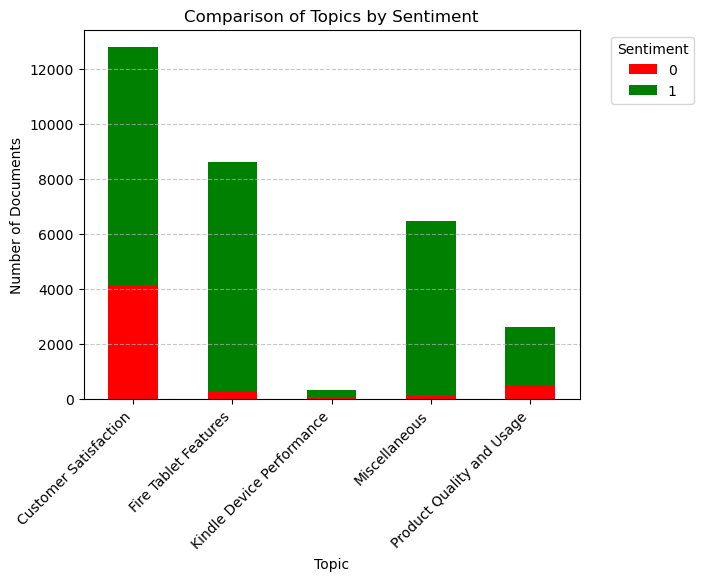

In [59]:
# Plot the comparison of topics by sentiment
plt.figure(figsize=(10, 6))
topic_comparison.plot(kind='bar', stacked=True, cmap='coolwarm', color=['red', 'green'])
plt.title('Comparison of Topics by Sentiment')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot as a JPG image
plt.savefig(r'C:\Users\Great Woman\OneDrive\Pictures\JPG PICTURE\topic_comparison.jpg', bbox_inches='tight')


# Show the plot
plt.show()


In [ ]:

 import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load pre-trained model
model = tf.keras.applications.VGG16(weights='imagenet', include_top=True)

# Choose target neuron(s)
target_neuron_index = 0  # Index of the neuron to maximize activation

# Generate a random image array with shape (224, 224, 3)
random_image = np.random.rand(224, 224, 3)

# Ensure pixel values are within [0, 1] range
random_image = random_image / 255.0

# Expand dimensions to match the model's input shape
random_image = np.expand_dims(random_image, axis=0)

# Convert the array to a TensorFlow Variable
image = tf.Variable(random_image, dtype=tf.float32)

# Define loss function
@tf.function
def loss(image):
    with tf.GradientTape() as tape:
        tape.watch(image)
        predictions = model(image)
        target_activation = predictions[:, target_neuron_index]
    # Regularization term (optional)
    regularization = tf.norm(image)
    return -target_activation + 0.001 * regularization  # Adjust the balance between terms

# Optimization
optimizer = tf.optimizers.Adam(learning_rate=0.01)  # Start with a smaller learning rate
for step in range(500):  # Increase the number of optimization steps
    with tf.GradientTape() as tape:
        tape.watch(image)
        current_loss = loss(image)
    gradients = tape.gradient(current_loss, image)
    optimizer.apply_gradients([(gradients, image)])

    if step % 50 == 0:  # Print loss every 50 steps
        print(f"Step {step}, Loss: {current_loss.numpy()}")

# Visualization
plt.imshow(image.numpy()[0])  # No need to normalize again for visualization
plt.axis('off')
plt.show()


Step 0, Loss: [0.00065034]
Step 50, Loss: [-0.00013935]


In [61]:
#  y_test contains the true labels and y_pred contains the predicted labels
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9463359273670557
Precision: 0.9446721963697625
Recall: 0.9463359273670557
F1-score: 0.942043950054414
